# Title Page

Understanding and Predicting Patient No-Show Rates in Healthcare

Final Project- Data 602

Shaya Engelman

May 5th, 2024

Professor Schettini

# Abstract

This research project aims to predict patient no-shows for medical appointments, a significant issue in healthcare due to the implications for resource utilization and revenue. Utilizing a dataset of over 100,000 medical appointments in Brazil, the study conducts a thorough data preparation process, including cleaning, anomaly fixing, and feature engineering. The data encompasses patient demographics, medical history, sms reminders, and appointment attendance. The data interacts with no-show rates differently for same-day appointments versus non same-day appointments and is split in two to account for that difference. The study finds the key predictor of no-shows is indeed same-day versus non same-day. Furthermore, the study reveals some other valuable predictors such as sms reminders. Various recommendations are included based on insights from the research. This project underscores the potential of data science in improving healthcare and its outcomes.


# Introduction:

In the realm of healthcare, the challenge of patient no-shows is a significant obstacle, resulting in wasted resources, diminished revenue, and suboptimal patient outcomes. The ability to anticipate which patients are likely to miss their appointments can help mititgate this issue. By utilizing predictive analytics, healthcare providers can attempt to proactively identify individuals at risk of not attending their scheduled appointments, thereby enabling both, targeted interventions to mitigate them and schedule alternative activities during those times.

This project seeks to address the question: Can we accurately forecast patient attendance, distinguishing those who will honor their appointments from those who may cancel last minute or fail to show up altogether? Through this exploration, our goal is to equip healthcare providers with practical insights to enhance appointment scheduling, allocate resources effectively, and improve patient engagement strategies.

Motivation for this investigation stems from real-world challenges encountered by healthcare professionals, including the experiences of my wife, a dedicated Registered Dietitian. Through firsthand encounters with the repercussions of patient no-shows, such as missed opportunities to assist others due to unfilled appointment slots, the urgency to develop effective predictive models becomes ever more apparent to me.

# Data

This dataset was found on Kaggle here https://www.kaggle.com/datasets/joniarroba/noshowappointments/data. It contains information on over 100,000 medical appointments in Brazil. The dataset includes information on patient demographics, medical history, and whether or not the patient showed up for their appointment.

As seen in the below table, the dataset contains the following variables: It has the patient ID, Appointment ID, gender, the day the appointment was scheduled, appointment day, age, neighborhood patient lives in, scholarship status, hypertension, diabetes, alcoholism, handicap status, SMS received as a reminder, and ,finally, whether or not the patient showed up for their appointment. This dataset is collected from a hospital in Brazil. Scholarship status refers to whether or not the patient is enrolled in the Bolsa Familia program which is a social welfare program in Brazil.

In [500]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

file_path = "C:\\Users\\shaya\\OneDrive\\Documents\\Final Project\\Data\\KaggleV2-May-2016.csv"
data = pd.read_csv(file_path)

data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


# Data Cleaning

In [501]:
# start by making a copy of the data to work with
df = data.copy()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


The data seems to be relatively clean. However, there is some cleaning to do:

There are typos in the names of columns 'Hipertension' and 'Handcap', the columns will all be renamed with one naming convention.

Columns 'PatientId' and 'AppointmentID' are numeric columns but, while their values are indeed integers, they should not be treated as numbers. These columns will be changed to string columns.

Columns 'Gender' and 'No-Show' should be converted to binary integer columns.

Columns 'ScheduledDay' and 'AppointmentDay' will be converted to datetime columns.

In [502]:
# rename columns to fix typos and make them share one convention
df.rename(columns={'PatientId': 'patient_id', 'AppointmentID': 'appointment_id', 'Gender': 'male',
                    'ScheduledDay': 'scheduled_day', 'AppointmentDay': 'appointment_day', 'Age': 'age',
                    'Neighbourhood': 'neighborhood', 'Scholarship': 'scholarship', 'Hipertension': 'hypertension',
                    'Diabetes': 'diabetes', 'Alcoholism': 'alcoholism', 'Handcap': 'handicap',
                    'SMS_received': 'sms_received', 'No-show': 'no_show'
                    }, inplace=True)

# convert id columns to string
df['patient_id'] = df['patient_id'].astype(str)
df['appointment_id'] = df['appointment_id'].astype(str)

# convert binary columns to integer
df['male'].replace(['F', 'M'], [0,1],inplace=True)
df['no_show'].replace(['No', 'Yes'], [0,1],inplace=True)

# convert date columns to datetime
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])



In [503]:
# print the first few rows of the cleaned data
df.head(10)

,patient_id,appointment_id,male,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296.0,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438.0,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951.0,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174.0,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183.0,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,95985133231274.0,5626772,0,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0
6,733688164476661.0,5630279,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3449833394123.0,5630575,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1
8,56394729949972.0,5638447,0,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,0
9,78124564369297.0,5629123,0,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0


# Exploratory Data Analysis

The describe() function reveals some interesting insights into our data. Firstly, the average age of patients attending appointments is 37 years, with a considerable spread indicated by a standard deviation of 23 years. There appears to be an outlier in age with a minimum value of -1, which requires further investigation. The various medical conditions included in the dataset all have varying degrees of class imbalance, such as hypertension (mean prevalence of 20%),diabetes (7% prevalence), while alcoholism is relatively uncommon (3% prevalence). The majority of patients did not receive SMS reminders (mean proportion of 32%). The statistics also reveal extreme values in the handicap variable, with a maximum value of 4, suggesting potential data integrity issues or varying definitions of disability levels. Further investigation of the handicap variable will be needed. The 'age' variable seems to be the only continuous variable in our dataset. 

In [504]:
df.describe()

,male,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


## Visualizing the Distributions of the Variables

Utilizing a boxplot and histogram with a density overlay allows us to explore the distribution of the Age variable. They show some alarming results. As mentioned earlier, the plots shows a minimum age of -1 which should not be possible. Additionally, the plots reveal an outlier at age 115. While possible, it is very unlikely to be a real datapoint. The histogram shows a peak at 0 which is unlikely as that would  mean that a  disproportionate number of patients are newborns. While newborns do tend to have higher amounts of doctor visits, the diseases recorded here are very unlikely to be found in babies. This amount of 0s is possibly due to missing data and therefore skews the summary of the mean age. This will need to be investigated further. The rest of the distribution makes sense though, it is mostly uniform at the beginning and starts declining as age grows and there are fewer people of that age in the population.

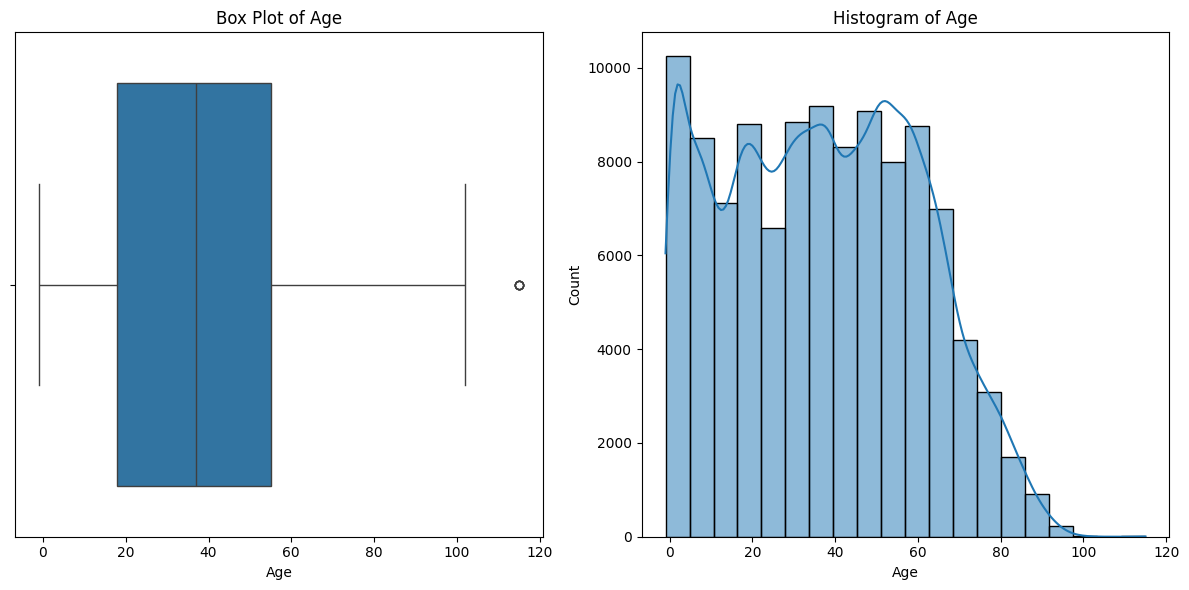

In [505]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='Age', data=data, ax=axes[0])
axes[0].set_title('Box Plot of Age')

sns.histplot(data['Age'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Age')

plt.tight_layout()
plt.show()

Visualizing the categorical variables in our dataset reveals some interesting observations. There is a surprising class imbalance of gender with almost twice the amount of females in the dataset than males. Similarly, only around a third of the patients received an SMS reminder about their appointment. As mentioned earlier, the various diseases all have heavy class imbalance as well, but that is to be expected. Importantly, the target variable 'no-show' also has a heavy class imbalance. This is very important to know when building models to predict it. Perhaps the most alarming takeaway from these plots is the fact that there are five responses in the handicap column. This will be investigated.

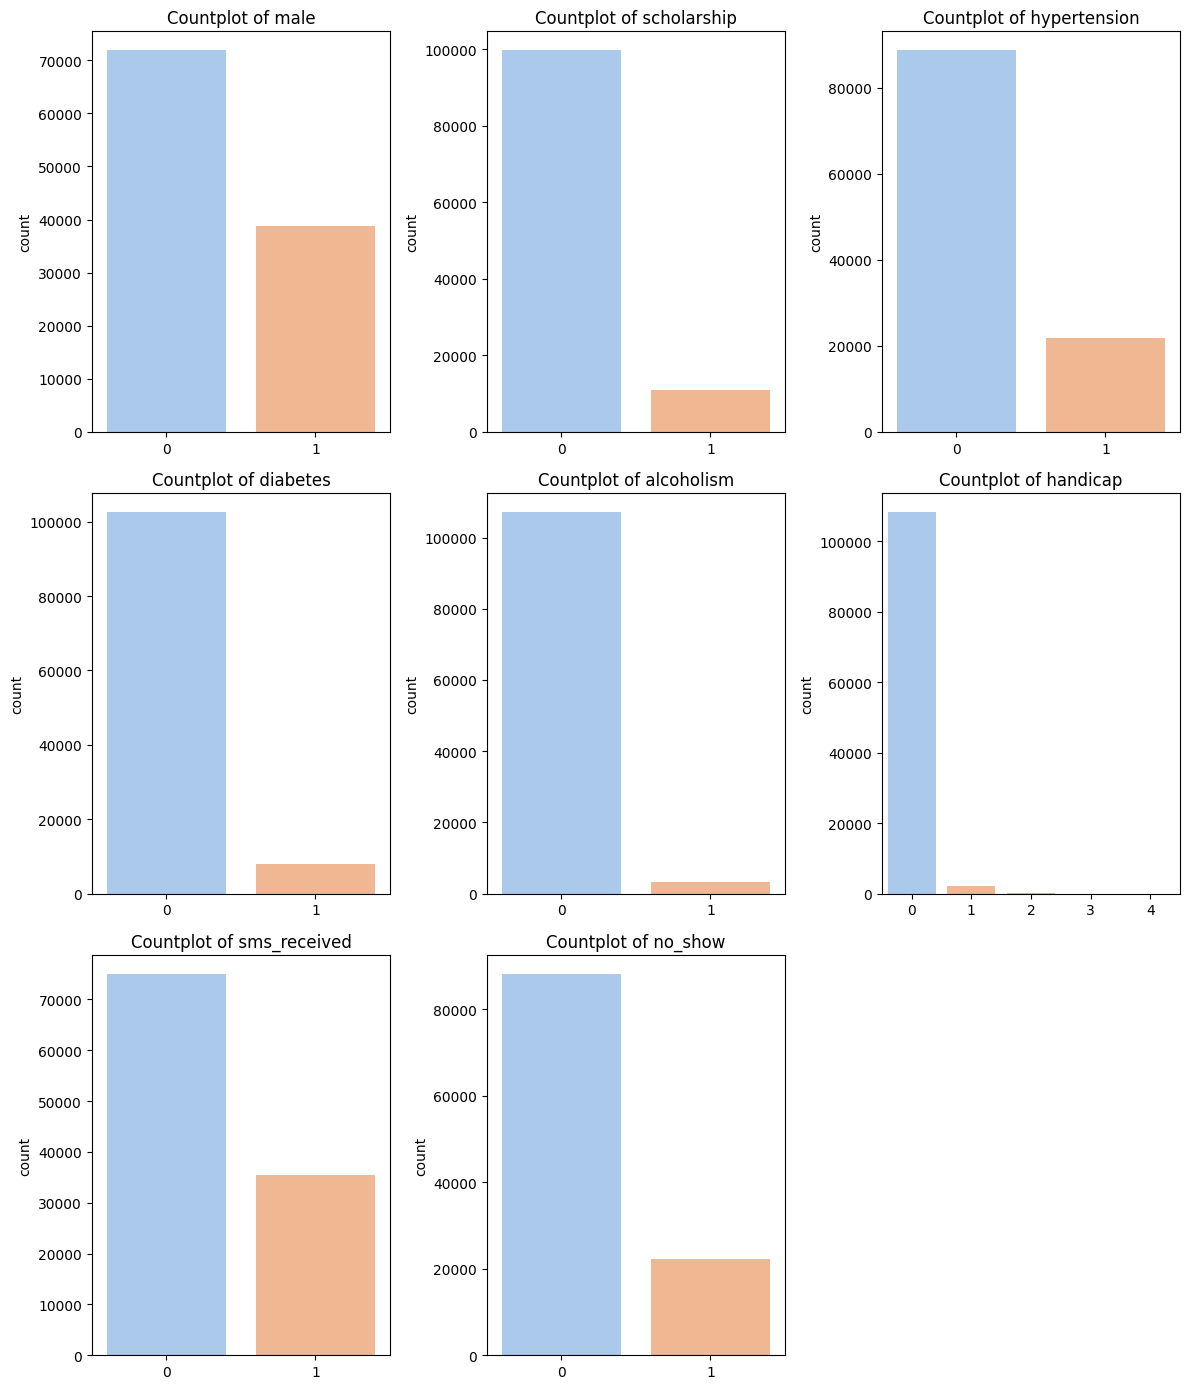

In [506]:
binary_columns = ["male", "scholarship", "hypertension", "diabetes", "alcoholism", "handicap", "sms_received", "no_show"]

fig, axes = plt.subplots(3, 3, figsize=(12, 14))
axes = axes.flatten()

for i, col in enumerate(df[binary_columns].columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel', hue=col, legend=False)
    axes[i].set_title(f'Countplot of {col}')  # Set title for each subplot
    axes[i].set_xlabel('')  # Remove x-axis label

# Remove unused subplots
for ax in axes[len(binary_columns):]:
    ax.remove()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

The neighborhood column has 81 distinct neighborhoods. The neighborhoods are not at all distributed evenly, with the largest having 7717 instances ranging all the way down to the smalest only having one instance.

In [507]:
distinct_counts = df['neighborhood'].value_counts()
distinct_counts

neighborhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64

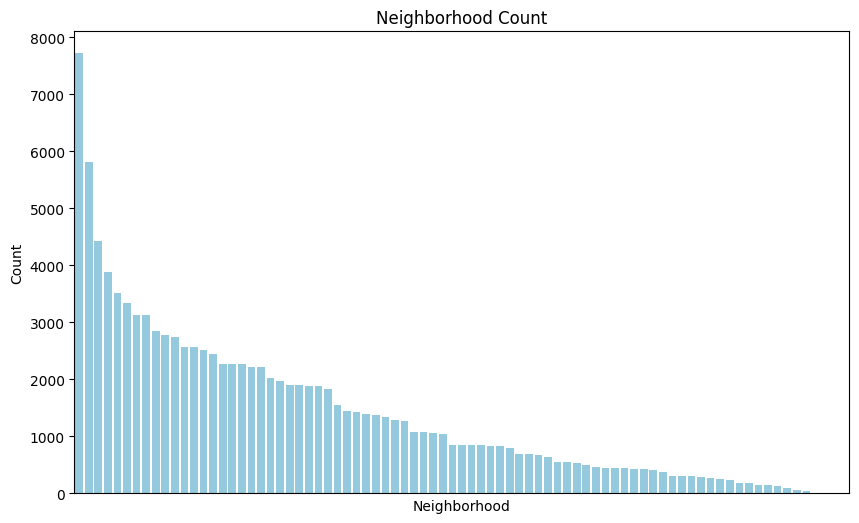

In [508]:
# Create a countplot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='neighborhood', order=distinct_counts.index, color='skyblue')

# Remove the xticks to avoid clutter
plt.xticks([])

# Set the title and labels
plt.title('Neighborhood Count')
plt.xlabel('Neighborhood')
plt.ylabel('Count')

# Show the plot
plt.show()

## Correlation Matrix

The heatmap below reveals the correlation between the variables in the dataset. This is important in order to be able to account for multicollinearity in model building among other reasons. Hypertension is significantly correlated with age and diabetes. Other than those relationships nothing stands out as capable of causing problems. Extremely surprisingly, sms_received is the variable with the highest correlation with the target variable, no_show, implying that receiving an sms_reminder makes one less likely to keep their appointment.

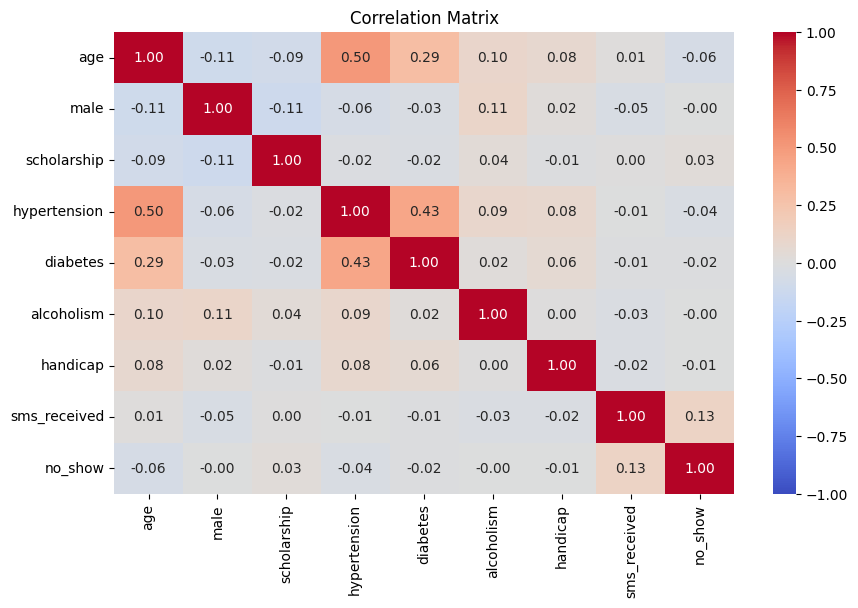

In [509]:
#correlation matrix
numeric_columns = ["age", "male", "scholarship", "hypertension", "diabetes", "alcoholism", "handicap", "sms_received", "no_show"]

cor_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Data Prep and Wrangling

## Explore and fix anomalies

### Anomalies in Age

As noted above, the age column has a few anomalies. There are entries with an ages of -1 and 115 to explore and a seemingly disproportionate amount of 0s. Since there is only one entry with the negatve value for age and we have no hypothesis of what it might represent, we can assume it is an error and safely remove it.  For the entries with age at 115, by selecting those rows it becomes apparent that four of the five such entries are all the same patient. This makes the entry make more sense as there can plausibly be 2 patients at that age. We will keep these entries in our dataset

In [510]:
#print the row where age = -1 and age > 100
df[(df['age'] == -1) | (df['age'] > 100)]

,patient_id,appointment_id,male,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
58014,976294799775439.0,5651757,0,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,0
63912,31963211613981.0,5700278,0,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
63915,31963211613981.0,5700279,0,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
68127,31963211613981.0,5562812,0,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
76284,31963211613981.0,5744037,0,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
90372,234283596548.0,5751563,0,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,0
97666,748234579244724.0,5717451,0,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,0
99832,465943158731293.0,5775010,0,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0


In [511]:
# drop the row where age = -1
df = df[df['age'] != -1]

We noted a disproportionate amount of 0 year old patients in the dataset. It is possible that missing data was encoded as 0s. To check if the 0s are all indeed babies or if there might be some error in the data we can check for records where age is 0 but hypertension or alcoholism is present. Since babies are extremely unlikely to suffer from those diseases we can use that as a metric if they are all indeed babies. Since there are no rows where age is 0 and those diseases are present we assume the entries are correct and leave them as is.

In [512]:
df[(df['age'] == 0) & ((df['hypertension'] == 1) | (df['alcoholism'] == 1))]

,patient_id,appointment_id,male,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


### Anomalies in Handicap

We noted a range of 0-4 for the handicap variable. This was supposed to be a binary variable. We print the counts of handicap greater than 1 to see if we can detect a pattern. The steadily decreasing count of handicap does imply some type of real value, possibly varying degrees of handicapness. A value due to a typo should be just as likely to be 4 as 2, since we detect a pattern we will not delete tham. However, since it isn't likely to have a larger impact on the target variable because it is greater we convert all non-zero values to 1.

In [513]:
# print counts of handicap =2, 3, 4
print(df['handicap'].value_counts())

handicap
0    108285
1      2042
2       183
3        13
4         3
Name: count, dtype: int64


In [514]:
#convert all values of handicap > 1 to 1
df['handicap'] = df['handicap'].apply(lambda x: 1 if x > 1 else x)

## Feature Engineering

We will use the data provided to generate new variables that may be of interest to us. 

### Create time between column

The dataset contains a column for both the date the appointment was created and for the date it was scheduled for. There is likely a correlation between the length of time between the date the appointment was made and for when it was made for and the no-show rate. We will generate a new column with the total amount of days between them. Unfortunately, while there is likely a relationship between the time of day of the appointment and the rate of no-shows, the dataset does not contain that information. The dataset does contain the time the appointment was created, and while not likely a predictor of no-show rates, we will preserve this information in case it is relevant for our models. We split the time from the date into a new column and convert the date columns to only contain the dates.

Using the cleaned date columns we create a new column with the amount of days between the appointment scheduling and the actual appointment. We then print any records with a negative waiting period. After analyzing them, we see there is clearly an error in the data as they are recorded as scheduled after they were performed. Since there are only 5 such records, we can safely delete them.

After creating the new column we plot the counts of the amounts of days between them to get an overview of the distribution. We notice a massive amount of 0s, representing same-day appointments and a steadily decreasing amount of days going forward, as can be expected.

In [515]:
# Split out the time
df['scheduled_time'] = df['scheduled_day'].dt.time

# Create new date columns
df['scheduled_date'] = df['scheduled_day'].dt.date
df['appointment_date'] = df['appointment_day'].dt.date

# Convert 'appointment_date' and 'scheduled_date' back to datetime format
df['appointment_date'] = pd.to_datetime(df['appointment_date'])
df['scheduled_date'] = pd.to_datetime(df['scheduled_date'])

# Drop the original columns
df.drop(['scheduled_day', 'appointment_day'], axis=1, inplace=True)

# Print the first few rows
df.head(15)

,patient_id,appointment_id,male,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_time,scheduled_date,appointment_date
0,29872499824296.0,5642903,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0,18:38:08,2016-04-29,2016-04-29
1,558997776694438.0,5642503,1,56,JARDIM DA PENHA,0,0,0,0,0,0,0,16:08:27,2016-04-29,2016-04-29
2,4262962299951.0,5642549,0,62,MATA DA PRAIA,0,0,0,0,0,0,0,16:19:04,2016-04-29,2016-04-29
3,867951213174.0,5642828,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,17:29:31,2016-04-29,2016-04-29
4,8841186448183.0,5642494,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0,16:07:23,2016-04-29,2016-04-29
5,95985133231274.0,5626772,0,76,REPÚBLICA,0,1,0,0,0,0,0,08:36:51,2016-04-27,2016-04-29
6,733688164476661.0,5630279,0,23,GOIABEIRAS,0,0,0,0,0,0,1,15:05:12,2016-04-27,2016-04-29
7,3449833394123.0,5630575,0,39,GOIABEIRAS,0,0,0,0,0,0,1,15:39:58,2016-04-27,2016-04-29
8,56394729949972.0,5638447,0,21,ANDORINHAS,0,0,0,0,0,0,0,08:02:16,2016-04-29,2016-04-29
9,78124564369297.0,5629123,0,19,CONQUISTA,0,0,0,0,0,0,0,12:48:25,2016-04-27,2016-04-29


In [516]:
# create a new column for the number of days between scheduled and appointment day
df['days_between'] = (df['appointment_date'] - df['scheduled_date']).dt.days

# check for negative values in the new column
negative_waiting_time = df['days_between'] < 0
negative_waiting_time.sum()

# print the rows with negative waiting time
df[negative_waiting_time]

,patient_id,appointment_id,male,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_time,scheduled_date,appointment_date,days_between
27033,7839272661752.0,5679978,1,38,RESISTÊNCIA,0,0,0,0,1,0,1,10:51:53,2016-05-10,2016-05-09,-1
55226,7896293967868.0,5715660,0,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,14:50:41,2016-05-18,2016-05-17,-1
64175,24252258389979.0,5664962,0,22,CONSOLAÇÃO,0,0,0,0,0,0,1,13:43:58,2016-05-05,2016-05-04,-1
71533,998231581612122.0,5686628,0,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,13:49:20,2016-05-11,2016-05-05,-6
72362,3787481966821.0,5655637,1,7,TABUAZEIRO,0,0,0,0,0,0,1,06:50:57,2016-05-04,2016-05-03,-1


In [517]:
# Drop the rows with negative waiting time
df = df[~negative_waiting_time]

df.head()

,patient_id,appointment_id,male,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_time,scheduled_date,appointment_date,days_between
0,29872499824296.0,5642903,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0,18:38:08,2016-04-29,2016-04-29,0
1,558997776694438.0,5642503,1,56,JARDIM DA PENHA,0,0,0,0,0,0,0,16:08:27,2016-04-29,2016-04-29,0
2,4262962299951.0,5642549,0,62,MATA DA PRAIA,0,0,0,0,0,0,0,16:19:04,2016-04-29,2016-04-29,0
3,867951213174.0,5642828,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,17:29:31,2016-04-29,2016-04-29,0
4,8841186448183.0,5642494,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0,16:07:23,2016-04-29,2016-04-29,0


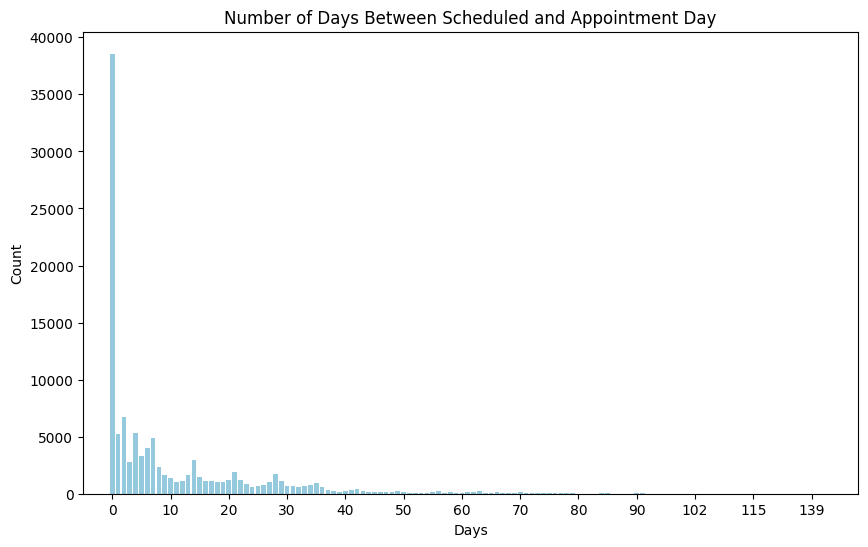

In [518]:
# create a barplot of the number of days between scheduled and appointment day
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='days_between', color='skyblue')

# Set the title and labels
plt.title('Number of Days Between Scheduled and Appointment Day')
plt.xlabel('Days')
plt.ylabel('Count')

# Get current tick locations and labels
locs, labels = plt.xticks()

# Set xticks to only every 10th label
plt.xticks(locs[::10], labels[::10])

# Set the x-limits of the plot to start at 0
plt.xlim(-5, max(locs))

# Show the plot
plt.show()

### Create a column for same day appointments

During the data exploration process, we noticed a shocking positive relationship between sms reminders and the rate of no-shows. This seems completley illogical and counterintuitive. Upon noticing the amount of records with 0 days between the appointment created date and actual date we realize a possible skew in our data. Patients making same-day appointments are likely not receiving sms reminders but are very likely to come to their appointments. We create a binary column to record same-day appointments to be able to consider this relationship in the model building.

In [519]:
# create a column for same day appointments
df['same_day'] = (df['days_between'] == 0).astype(int)

In [520]:
# check the relationship between same day appointments and no-shows
same_day = df['same_day'] == 1
no_show = df['no_show'] == 1

same_day_no_show = df[same_day & no_show].shape[0]
same_day_no_show

same_day_no_show_percentage = same_day_no_show / df[same_day].shape[0] * 100
same_day_no_show_percentage


4.647061874384108

### Create an appointment day of week column

We use the existing data to create a new column with the days of the week the appointment was scheduled for. There is possibly a relationship between certain days and the rate of no-shows.

We then get a count and visualize the count of each day to seee the distribution. We note that the weekdays are not uniformally distributed, however, there is a large anough sample of each of them to not worry about them not being represented enough. However, it is very disappointing to see the data does not contain any Sunday appointments and a very small amount, 39, of Saturday appointments as weekday versus weekend appointment presumably have different relationships with no-shows.

In [521]:
# create a new column for the day of the week of the appointment
df['day_of_week'] = df['appointment_date'].dt.day_name()

# print the count of appointments for each day of the week
df['day_of_week'].value_counts()

day_of_week
Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: count, dtype: int64

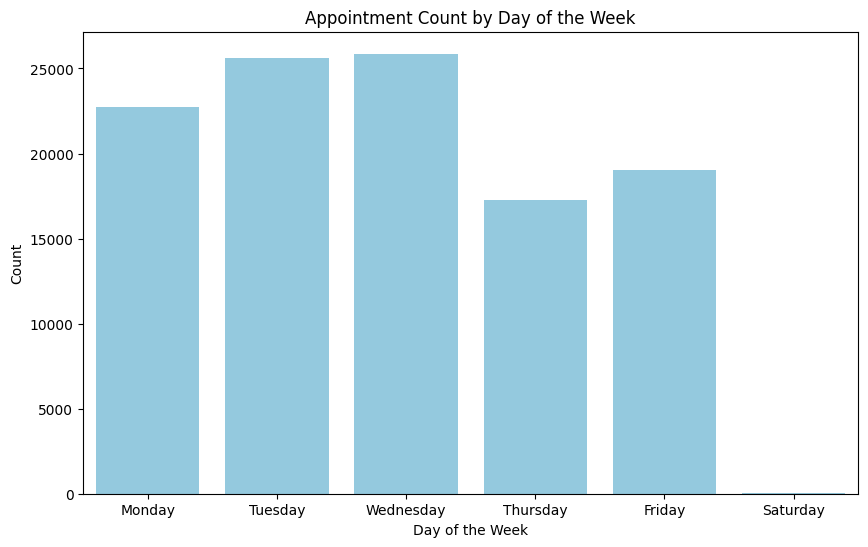

In [522]:
# create a histogram of the day of the week of the appointment
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='day_of_week', color='skyblue', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Set the title and labels
plt.title('Appointment Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

# Show the plot
plt.show()

### Create an appointment month column.

We repeat the above process to create a column for the month the appointment was made in. The month can be important as weather conditions can impact the rate of no-shows. 

We check the count of each month in our dataset and note that the dataset only contains records from April through June with a massively disproprtionate amount of the data from May. This minimizes the utility of this new column.

In [523]:
# create a new column for the month of the appointment
df['month'] = df['appointment_date'].dt.month_name()

# print the count of appointments for each month
df['month'].value_counts()


month
May      80836
June     26450
April     3235
Name: count, dtype: int64

## One Hot Encode Categorical Data

We have some columns with categorical data, since linear models require numeric input, we will create dummy variables for these columns. We do this for the neighborhood column, day of week column and the month column. We also drop the first dummy of each column to avoid multicollinearity issues with the models. Even though Python handles Boolean values as binary 1s and 0s, we convert the results to integers to help with readability.

Since there are 81 distinct values in the neighborhood column alone, this will massively increase the dimensionality of the dataset. We save this as a new dataframe and check the correlation with no-show rates. Since there does not seem to be a strong correlation and this amount of variables will increase the dimensionality of our dataset and decrease model interpretability, we will leave it out of our final models.

In [524]:
# encode the neighborhood column and save it as a new dataframe
neighborhood_df = pd.get_dummies(df['neighborhood'])

#neighborhood_df.head()

# check correlation between neighborhoods and no-shows
neighborhood_df['no_show'] = df['no_show']

neighborhood_correlation = neighborhood_df.corr()['no_show'].sort_values(ascending=False)
neighborhood_correlation

no_show              1.000000
ITARARÉ              0.027432
SANTOS DUMONT        0.023500
JESUS DE NAZARETH    0.017054
ILHA DO PRÍNCIPE     0.011849
                       ...   
NOVA PALESTINA      -0.008767
SOLON BORGES        -0.008908
SANTO ANTÔNIO       -0.010431
SANTA MARTHA        -0.018496
JARDIM DA PENHA     -0.018593
Name: no_show, Length: 82, dtype: float64

In [525]:
# encode the day of week, and month columns 
df_encoded = pd.get_dummies(df, columns=['day_of_week', 'month'], drop_first=True)

# drop the neighborhood column
df_encoded.drop(['neighborhood'], axis=1, inplace=True)

# Convert boolean columns to int
bool_cols = [col for col in df_encoded if df_encoded[col].dtype == 'bool']
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

df_encoded.head()

,patient_id,appointment_id,male,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,...,appointment_date,days_between,same_day,day_of_week_Monday,day_of_week_Saturday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,month_June,month_May
0,29872499824296.0,5642903,0,62,0,1,0,0,0,0,...,2016-04-29,0,1,0,0,0,0,0,0,0
1,558997776694438.0,5642503,1,56,0,0,0,0,0,0,...,2016-04-29,0,1,0,0,0,0,0,0,0
2,4262962299951.0,5642549,0,62,0,0,0,0,0,0,...,2016-04-29,0,1,0,0,0,0,0,0,0
3,867951213174.0,5642828,0,8,0,0,0,0,0,0,...,2016-04-29,0,1,0,0,0,0,0,0,0
4,8841186448183.0,5642494,0,56,0,1,1,0,0,0,...,2016-04-29,0,1,0,0,0,0,0,0,0


In [526]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   patient_id             110521 non-null  object        
 1   appointment_id         110521 non-null  object        
 2   male                   110521 non-null  int64         
 3   age                    110521 non-null  int64         
 4   scholarship            110521 non-null  int64         
 5   hypertension           110521 non-null  int64         
 6   diabetes               110521 non-null  int64         
 7   alcoholism             110521 non-null  int64         
 8   handicap               110521 non-null  int64         
 9   sms_received           110521 non-null  int64         
 10  no_show                110521 non-null  int64         
 11  scheduled_time         110521 non-null  object        
 12  scheduled_date         110521 non-null  datetime6

## Finalize Dataset

We now drop the columns we will not need for the modeling stage. These include the original neighborhood, day of week and month columns and they also include the ID columns. While appointment_id is merely an index and provides no additional information, patient_id is useful as it allows us to see which multiple appointments were made by one specific patient and there is very likely to be a strong relationship between a patient not showing up to appointments after already not showing up in the past. However, this information is not represented by the ID column and we will therefore remove it. We also remove scheduled_time as that is very unlikely to be a predictor of no-show rates. We also remove the original date columns.

Finally, we split our data into test and train datasets before starting any model building to avoid data leakage.

In [527]:
df_prepped = df_encoded.drop(['patient_id', 'appointment_id', 'scheduled_time', 'scheduled_date', 'appointment_date'], axis=1)

df_prepped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   male                   110521 non-null  int64
 1   age                    110521 non-null  int64
 2   scholarship            110521 non-null  int64
 3   hypertension           110521 non-null  int64
 4   diabetes               110521 non-null  int64
 5   alcoholism             110521 non-null  int64
 6   handicap               110521 non-null  int64
 7   sms_received           110521 non-null  int64
 8   no_show                110521 non-null  int64
 9   days_between           110521 non-null  int64
 10  same_day               110521 non-null  int32
 11  day_of_week_Monday     110521 non-null  int32
 12  day_of_week_Saturday   110521 non-null  int32
 13  day_of_week_Thursday   110521 non-null  int32
 14  day_of_week_Tuesday    110521 non-null  int32
 15  day_of_week_Wednesday 

In [528]:
df_prepped.head()

,male,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_between,same_day,day_of_week_Monday,day_of_week_Saturday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,month_June,month_May
0,0,62,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,56,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,62,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,56,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [529]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X = df_prepped.drop('no_show', axis=1)
y = df_prepped['no_show']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1125, stratify=y)

# check the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((88416, 17), (22105, 17), (88416,), (22105,))

In [530]:
# write the prepped data to a new csv file
df_prepped.to_csv('C:\\Users\\shaya\\OneDrive\\Documents\\Final Project\\Data\\KaggleV2-May-2016-prepped.csv', index=False)




In [531]:
# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

For the purpose of this classification we assume that we want to maximize our recall and catch as many true positives as posisble. This would presumably be the case when a healthcare provider is trying to plan to take preventative measures to avoid the no-show and is therefore ok with there being a higher rate of false positives as well.

We first create a dummy classifier that predicts no-shows at random based on the proportion of no-shows in the dataset. This will be used as our baseline model that we want to beat. 

In [532]:
from sklearn.dummy import DummyClassifier

# Create a dummy classifier that always predicts the majority class
clf = DummyClassifier(strategy='most_frequent')

clf = DummyClassifier(strategy='stratified', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
class_report_dummy = classification_report(y_test, y_pred)

dummy_accuracy = accuracy_score(y_test, y_pred)
dummy_precision = precision_score(y_test, y_pred)
dummy_recall = recall_score(y_test, y_pred)
dummy_f1 = f1_score(y_test, y_pred)

Our first attempt is to just throw everything we have selected in the previous section and create a logistic regression model. This model outperforms our baseline model a bit in terms of precision, recall and F1-score but does so at the expense of overall accuracy. The baseline model has an accuracy rate of 68% while this model only achieves 55%. 

In [533]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# build logistic regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=1125)
log_reg.fit(X_train, y_train)

# make predictions
y_pred = log_reg.predict(X_test)

# print the classification report
CLass_report_logistic = classification_report(y_test, y_pred)

# print the confusion matrix
#print(confusion_matrix(y_test, y_pred))

# calculate the accuracy, precision, recall, and f1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



NameError: name 'aic' is not defined

In [ ]:
# create a dataframe of the accuracy metrics of the two models for comparison
accuracy_metrics = pd.DataFrame({
    'Model': ['Dummy Classifier', 'Logistic Regression'],
    'Accuracy': [dummy_accuracy, accuracy],
    'Precision': [dummy_precision, precision],
    'Recall': [dummy_recall, recall],
    'F1 Score': [dummy_f1, f1]
})

accuracy_metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,Dummy Classifier,0.683827,0.218080,0.218911,0.218495
1,Logistic Regression,0.554309,0.293477,0.857943,0.437350


Additionally, the new model suffers from a relatively large amount of predictor variables that harm the model's interpretability.

In [ ]:
# extract the coefficients of the logistic regression model
coefficients = log_reg.coef_[0]
features = X_train.columns

# create a dataframe of the coefficients
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coefficients_df

,Feature,Coefficient
0,male,0.042727
1,age,-0.010670
2,scholarship,0.257039
3,hypertension,-0.047480
4,diabetes,0.100358
5,alcoholism,0.322281
6,handicap,0.155185
7,sms_received,-0.118666
8,days_between,0.008958
9,same_day,-2.107708


In [538]:
# rebuild the model using statsmodels and build a dataframe with all the coefficients and their p-values
import statsmodels as sm

X_train_sm = sm.tools.tools.add_constant(X_train)
log_reg_sm = sm.discrete.discrete_model.Logit(y_train, X_train_sm).fit()

coefficients_sm = log_reg_sm.params
p_values = log_reg_sm.pvalues

features = ['Intercept'] + list(X_train.columns)
coefficients_df_sm = pd.DataFrame({'Feature': features, 'Coefficient': coefficients_sm, 'P-Value': p_values})
coefficients_df_sm

#get aic
aic = log_reg_sm.aic
aic


Optimization terminated successfully.
         Current function value: 0.448040
         Iterations 7


79251.79470181503

Removing the weekday columns did not impact the metrics of our model at all. This means that it was just overcomplicating the model for no reason. We leave the Saturday column as there is plausible reason to consider that being a factor in no-shows.

In [536]:
#remove the weekday columns
X_train.drop(['day_of_week_Monday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'day_of_week_Thursday'], axis=1, inplace=True)
X_test.drop(['day_of_week_Monday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'day_of_week_Thursday'], axis=1, inplace=True)

# recreate the logistic regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=1125)
log_reg.fit(X_train, y_train)

# make predictions
y_pred = log_reg.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.48      0.63     17642
           1       0.29      0.86      0.44      4463

    accuracy                           0.55     22105
   macro avg       0.61      0.67      0.53     22105
weighted avg       0.80      0.55      0.59     22105



Similarly, removing the months columns only change the metrics very slightly.

In [537]:
# remove the month columns
X_train.drop(['month_May', 'month_June'], axis=1, inplace=True)
X_test.drop(['month_May', 'month_June'], axis=1, inplace=True)

# recreate the logistic regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=1125)
log_reg.fit(X_train, y_train)

# make predictions
y_pred = log_reg.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      0.47      0.62     17642
           1       0.29      0.87      0.44      4463

    accuracy                           0.55     22105
   macro avg       0.61      0.67      0.53     22105
weighted avg       0.80      0.55      0.59     22105



TypeError: 'numpy.float64' object is not callable

In [ ]:
# create a dataframe of the accuracy metrics of the two models for comparison
accuracy_metrics = pd.DataFrame({
    'Model': ['Dummy Classifier', 'Logistic Regression'],
    'Accuracy': [dummy_accuracy, accuracy],
    'Precision': [dummy_precision, precision],
    'Recall': [dummy_recall, recall],
    'F1 Score': [dummy_f1, f1],
    'AIC': [dummy_aic, aic]
})

accuracy_metrics

NameError: name 'dummy_aic' is not defined

When visualizing the coefficients of the predictor variables we instantly see some interesting insights. Firstly, the coefficient for same day appointments is by far the largest. We also see that sms received has a relatively small affect on the target variable, even if it is negative as expected. Notably, the coefficient for days between seems to be much smaller than expected. This is likely due to collinearity with same_day.

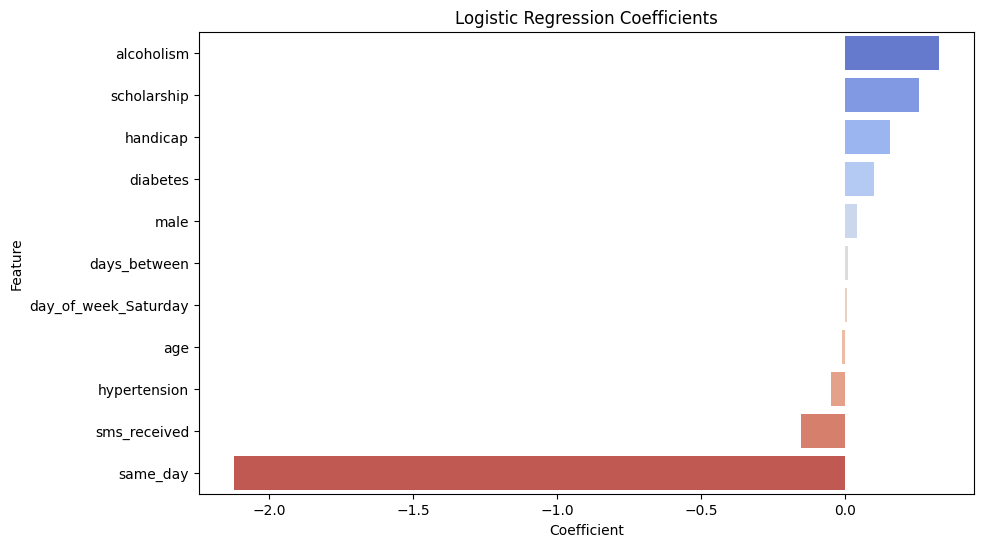

In [ ]:
# extract the coefficients of the logistic regression model
coefficients = log_reg.coef_[0]
features = X_train.columns

# create a dataframe of the coefficients
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# plot the coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='coolwarm')
plt.title('Logistic Regression Coefficients')
plt.show()

Since same_day is by far the largest predictor for no-shows, it makes sense to split our data into two, one for same-day appointments and one for all other days. Doing this will accomplish a few things. Firstly, it allows us to remove the same_day variable and shows us the full impact of days_between without collinearity. Similarly, it removes the bias against sms_received that is due to same-day appointments not receiving sms reminders but still having very low no-show rates.

Here, we split the data, build dummy classifiers to use as benchmarks for each dataset and compare our predictions.

In [ ]:
# create a subsample of the data where same day = 0 versus same day > 0
df_same_day = df_prepped[df['same_day'] == 1]
df_not_same_day = df_prepped[df['same_day'] == 0]

# select columns to use for the models removing the columns removed earlier and the now irrelevant same_day column
sel_cols = ['age', 'male', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'days_between', 'sms_received', 'no_show']

df_same_day = df_same_day[sel_cols]
df_not_same_day = df_not_same_day[sel_cols]



In [539]:
# create dummy models for same day and not same day appointments predicting with the same ratio as the original data
clf = DummyClassifier(strategy='stratified', random_state=1125)

# train the dummy model for non same day appointments
clf.fit(df_not_same_day.drop('no_show', axis=1), df_not_same_day['no_show'])

# make predictions for non same day appointments
dummy_y_pred_not_same_day = clf.predict(df_not_same_day.drop('no_show', axis=1))

# store dummy metrics
dummy_accuracy_not_same_day = accuracy_score(df_not_same_day['no_show'], dummy_y_pred_not_same_day)
dummy_precision_not_same_day = precision_score(df_not_same_day['no_show'], dummy_y_pred_not_same_day)
dummy_recall_not_same_day = recall_score(df_not_same_day['no_show'], dummy_y_pred_not_same_day)
dummy_f1_not_same_day = f1_score(df_not_same_day['no_show'], dummy_y_pred_not_same_day)

# train the dummy model for same day appointments
clf.fit(df_same_day.drop('no_show', axis=1), df_same_day['no_show'])

# make predictions for same day appointments
dummy_y_pred_same_day = clf.predict(df_same_day.drop('no_show', axis=1))

# store dummy metrics
dummy_accuracy_same_day = accuracy_score(df_same_day['no_show'], dummy_y_pred_same_day)
dummy_precision_same_day = precision_score(df_same_day['no_show'], dummy_y_pred_same_day)
dummy_recall_same_day = recall_score(df_same_day['no_show'], dummy_y_pred_same_day)
dummy_f1_same_day = f1_score(df_same_day['no_show'], dummy_y_pred_same_day)

In [540]:
# create separate models for same day and not same day appointments
X_same_day = df_same_day.drop('no_show', axis=1)
y_same_day = df_same_day['no_show']

X_not_same_day = df_not_same_day.drop('no_show', axis=1)
y_not_same_day = df_not_same_day['no_show']

# delete constant columns from same day dataframe
X_same_day.drop(['sms_received', 'days_between'], axis=1, inplace=True)

# split the data into test and train sets
X_train_same_day, X_test_same_day, y_train_same_day, y_test_same_day = train_test_split(X_same_day, y_same_day, test_size=0.2, random_state=1125, stratify=y_same_day)

# build logistic regression model for same day appointments
log_reg_same_day = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=1125)
log_reg_same_day.fit(X_train_same_day, y_train_same_day)

# make predictions for same day appointments
y_pred_same_day = log_reg_same_day.predict(X_test_same_day)

# calculate the accuracy, precision, recall, and f1 scores for same day appointments
accuracy_same_day = accuracy_score(y_test_same_day, y_pred_same_day)
precision_same_day = precision_score(y_test_same_day, y_pred_same_day)
recall_same_day = recall_score(y_test_same_day, y_pred_same_day)
f1_same_day = f1_score(y_test_same_day, y_pred_same_day)

# print the classification report for same day appointments
#print(classification_report(y_test_same_day, y_pred_same_day))


# print the dummy classification report for same day appointments
#print(classification_report(df_same_day['no_show'], dummy_y_pred_same_day))

In [543]:
# print a dataframe with the accuracy metrics for the same day appointments for the dummy and logistic models
accuracy_metrics_same_day = pd.DataFrame({
    'Model': ['Dummy Classifier', 'Logistic Regression'],
    'Accuracy': [dummy_accuracy_same_day, accuracy_same_day],
    'Precision': [dummy_precision_same_day, precision_same_day],
    'Recall': [dummy_recall_same_day, recall_same_day],
    'F1 Score': [dummy_f1_same_day, f1_same_day]
})

accuracy_metrics_same_day

,Model,Accuracy,Precision,Recall,F1 Score
0,Dummy Classifier,0.910404,0.044882,0.045759,0.045316
1,Logistic Regression,0.564372,0.060854,0.581006,0.110169


In [541]:
# split the data into test and train sets
X_train_not_same_day, X_test_not_same_day, y_train_not_same_day, y_test_not_same_day = train_test_split(X_not_same_day, y_not_same_day, test_size=0.2, random_state=1125, stratify=y_not_same_day)

# build logistic regression model for not same day appointments
log_reg_not_same_day = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=1125)
log_reg_not_same_day.fit(X_train_not_same_day, y_train_not_same_day)

# make predictions for not same day appointments
y_pred_not_same_day = log_reg_not_same_day.predict(X_test_not_same_day)

# calculate the accuracy, precision, recall, and f1 scores for non same day appointments
accuracy_not_same_day = accuracy_score(y_test_not_same_day, y_pred_not_same_day)
precision_not_same_day = precision_score(y_test_not_same_day, y_pred_not_same_day)
recall_not_same_day = recall_score(y_test_not_same_day, y_pred_not_same_day)
f1_not_same_day = f1_score(y_test_not_same_day, y_pred_not_same_day)

# print the classification report for not same day appointments
print(classification_report(y_test_not_same_day, y_pred_not_same_day))

# print the dummy classification report for non same day appointments
print(classification_report(df_not_same_day['no_show'], dummy_y_pred_not_same_day))

              precision    recall  f1-score   support

           0       0.76      0.54      0.63     10288
           1       0.33      0.56      0.41      4104

    accuracy                           0.55     14392
   macro avg       0.54      0.55      0.52     14392
weighted avg       0.63      0.55      0.57     14392

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     51437
           1       0.28      0.28      0.28     20522

    accuracy                           0.59     71959
   macro avg       0.50      0.50      0.50     71959
weighted avg       0.59      0.59      0.59     71959



In [542]:
# print a dataframe with the accuracy metrics for the not same day appointments for the dummy and logistic models
accuracy_metrics_not_same_day = pd.DataFrame({
    'Model': ['Dummy Classifier', 'Logistic Regression'],
    'Accuracy': [dummy_accuracy_not_same_day, accuracy_not_same_day],
    'Precision': [dummy_precision_not_same_day, precision_not_same_day],
    'Recall': [dummy_recall_not_same_day, recall_not_same_day],
    'F1 Score': [dummy_f1_not_same_day, f1_not_same_day]
})

accuracy_metrics_not_same_day

,Model,Accuracy,Precision,Recall,F1 Score
0,Dummy Classifier,0.592212,0.284997,0.284914,0.284955
1,Logistic Regression,0.546484,0.327887,0.562378,0.414251


Comparing the metrics of each of the models against their respective dummy models allows us to see the efficacy of the models.

Based on these results, the loss of accuracy is too great to justify using this model to predict same-day no-shows. There simply isn't enough data in this dataset to predict no-shows when the appointment was made that same day. Since the vast majority of same day appointments keep it (95% of them), one would be better off predicting each individual case as the majority class, will show up, and in aggregate (for example, when trying to figure out total expected billing hours per year) as the ratio in the dataset. Trying to predict based on the data contained here just loses accuracy without actually giving much insight.

The exception would be if there is a reason one needs high recall. In that case, this model can still be useful as evidenced by the auc plot below.

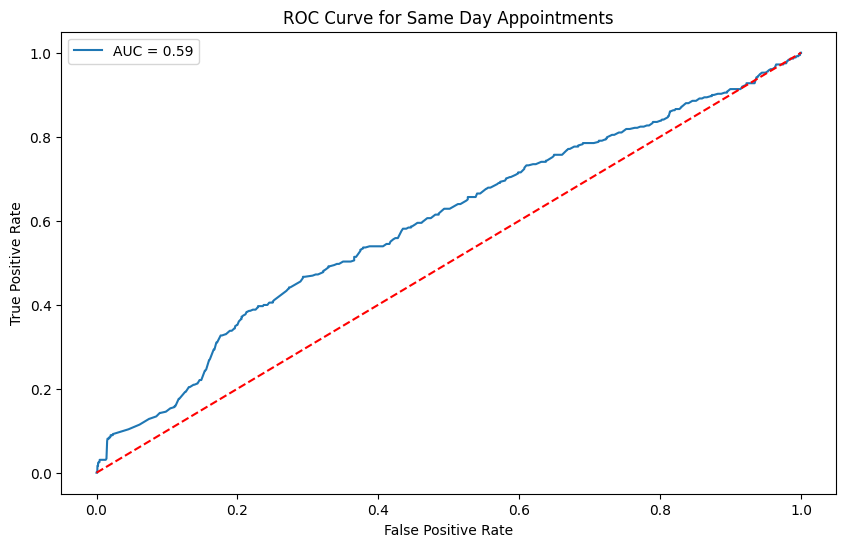

In [ ]:
# plot the roc curve for the same day appointments
from sklearn.metrics import roc_curve, roc_auc_score

# get the predicted probabilities for the positive class
y_pred_proba_same_day = log_reg_same_day.predict_proba(X_test_same_day)[:,1]

# calculate the fpr and tpr for the roc curve
fpr, tpr, thresholds = roc_curve(y_test_same_day, y_pred_proba_same_day)

# calculate the auc for the roc curve
roc_auc = roc_auc_score(y_test_same_day, y_pred_proba_same_day)

# plot the roc curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Same Day Appointments')
plt.legend()
plt.show()

In [ ]:
# extract the coefficients of the logistic regression model
coefficients = log_reg_same_day.coef_[0]
features = X_train_same_day.columns

# create a dataframe of the coefficients
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coefficients_df

,Feature,Coefficient
0,age,-0.012732
1,male,0.405096
2,scholarship,0.306731
3,hypertension,0.097852
4,diabetes,0.117842
5,alcoholism,-0.143358
6,handicap,0.557313


For non-same day appointments, this model has much more utility. While not great at a reliable prediction, the model is on par with the dummy model and easily surpasses it for many purposes. The overall score is roughly the same as before the split of the data but the dummy model performs much worse. This gives the model value to at least make predicitons even if not useful to fully rely on.

The model's coefficients reveal a relatively strong negative correlation between sms_recieved and no-shows, as expected, the model shows that receiving a sms reminder decreases the chance of a no-show by the log-odds of 0.165. In real terms this amounts to a decrease of around 15% in the odds of a no-show. We also see a surprisingly high relationship between alcoholism and rate of no-shows. Additionally, age and hypertension have a negative relationship with no-shows and higher age patients are more likely to keep their appointments. Scholarship has a high coefficient and is positively related with no-shows. I am unfamiliar with the full details of the scholarship program and thus cannot know why this would be the case. Possible factors can be, higher poverty rates, more children (more emergencies that can arise last minute), and not paying out of pocket for the appointment and therefore valuing it less.

In [ ]:
# extract the coefficients of the logistic regression model
coefficients = log_reg_not_same_day.coef_[0]
features = X_train_not_same_day.columns

# create a dataframe of the coefficients
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coefficients_df

,Feature,Coefficient
0,age,-0.010213
1,male,-0.042498
2,scholarship,0.281072
3,hypertension,-0.070584
4,diabetes,0.120840
5,alcoholism,0.433699
6,handicap,-0.028007
7,days_between,0.009606
8,sms_received,-0.164894


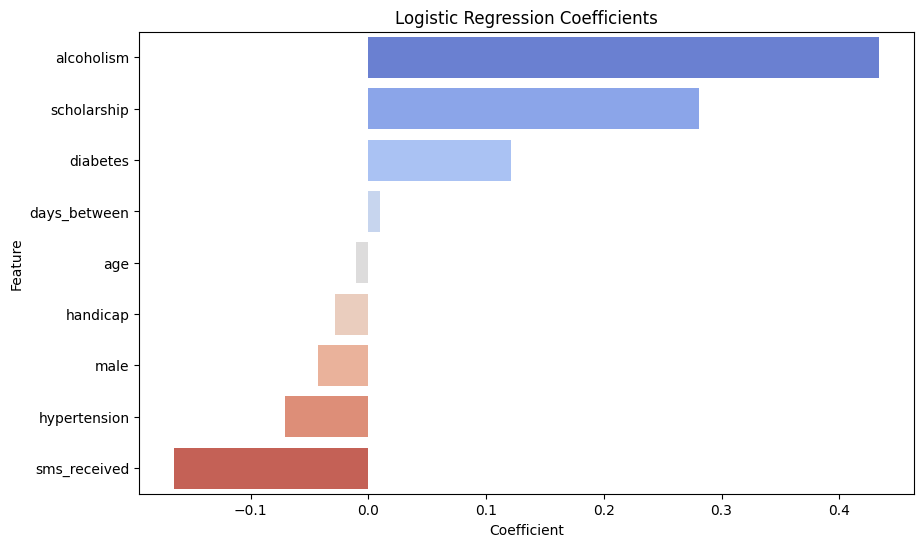

In [ ]:
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# plot the coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='coolwarm')
plt.title('Logistic Regression Coefficients')
plt.show()

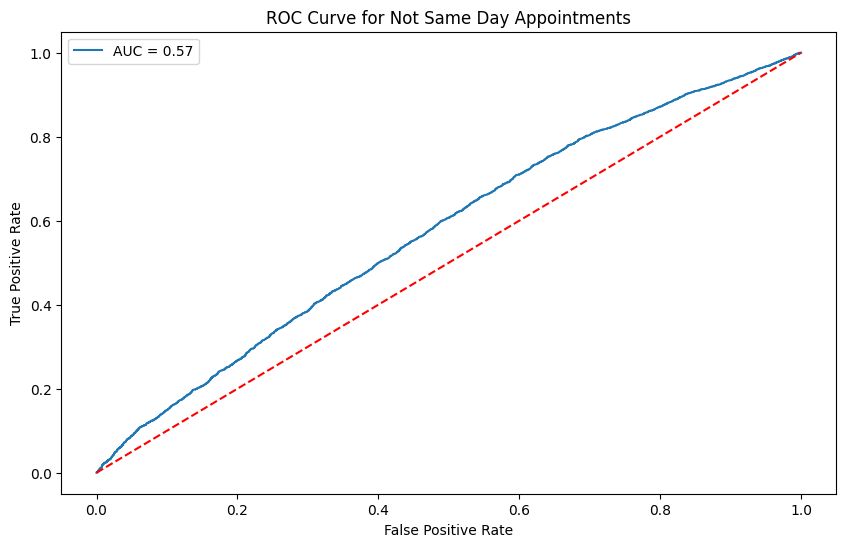

In [ ]:
# plot a roc curve for the not same day appointments
from sklearn.metrics import roc_curve, roc_auc_score

# get the predicted probabilities for the positive class
y_pred_proba_not_same_day = log_reg_not_same_day.predict_proba(X_test_not_same_day)[:,1]

# calculate the fpr and tpr for the roc curve
fpr, tpr, thresholds = roc_curve(y_test_not_same_day, y_pred_proba_not_same_day)

# calculate the auc for the roc curve
roc_auc = roc_auc_score(y_test_not_same_day, y_pred_proba_not_same_day)

# plot the roc curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Not Same Day Appointments')
plt.legend()
plt.show()


# Results

## Findings

We find that the single most important variable in determining whether a patient is likely to keep their appointment or not show up for it is if the appointment was made that same day. An appointment made for that same day is extremely likely to be kept. The data we have is not capable of predicting those rare cases when people do not keep their same-day appointments with any reasonable accuracy, This makes sense as no shows in this case are likely due to last-minute emergencies that popped up, making them very random and hard to ever predict.

For non-same day appointments we find that patients with alcoholism or the Brazilian Scholarship program are most likely to not show up while patients with hypertension are more likely to show up. Other chronic diseases did not have much impact either way. We also find that the older the patient the more likely they are to show up as well. Most importantly we find, sms reminders are the single most valuable predictor (out of the ones in our dataset) in predicting likelihood of showing up to appointments. 

## Recommendations

Here are some ways these findings can be implemented in a healthcare setting. Providers can try to not schedule more than one patient with alcoholism in any given narrow window. This would minimize the chances of there being multiple no-shows in succession, something all practitioners hate. The same can be done with participants in the Scholarship program. Alternatively, a provider can utilize the knowledge of older patients or those with hypertension being more likely to show to try scheduling them in close proximity with patients at risk of not showing up to also minimize the chances of multiple no-shows in a given window.

Providers can also ensure they send out sms reminders t all patients to try to ensure they come to their appointments. This might be the most useful tip since it is completely in the provider's control.

## Limitations

There are many variables that affect a patient showing up to their appointment that are not available in the dataset. For this reason, this model doesn't predict no-show rates with a very high accuracy.
Also, the data for this model was sourced from one 7 week window form one city in Brazil. All these factors can be different in other time periods, cities and countries. Socieconomic factors that differ form region to region can, and do, impact no-show rates. Another severe limitation of the model is the lack of both weather data for the given 7 week period and the time of day for the appointments. Both these factors certainly have a impact on the no-show rate of patients.

